# Importing the libraries

In [1]:
#importing the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from tabulate import tabulate

# Analysis on clean dataset

In [2]:
#loading the clean dataset

student_clean_data = pd.read_csv('D:/MPS - Analytics/ALY 6080 - Integrated Exp Learning/STUDENT RISK ANALYSIS - FEATURE DROPPING ANALYSIS/BTECH CGPA Feature Dropping/Student Risk Analysis_CleanedData.csv')

In [3]:
print("Total  number of Rows and Columns:")
print(student_clean_data.shape)
print("Column Names:")
print(student_clean_data.columns)

Total  number of Rows and Columns:
(1299, 38)
Column Names:
Index(['SR NO.', '10TH -  SCHOOL NAME ', '10TH - BOARD NAME ',
       '12TH / DIPLOMA - BOARD ', '12TH / DIPLOMA - COLLEGE NAME ',
       'AADHAR CARD NO ', 'ALTERNATE E- MAIL ID ', 'BRANCH ', 'CATEGORY ',
       'DATE OF BIRTH ', 'E- MAIL ID ', 'ENTRANCE TAKEN ', 'GENDER ',
       'INTERNSHIP', 'PAN NUMBER ', 'RANK OF ENTRANCE TEST ', 'ROLL NO ',
       'SEAT TYPE ', 'STUDENT CITY ', 'STUDENT DISTRICT ',
       'STUDENT FIRST NAME ', 'STUDENT FULL NAME ', 'STUDENT LAST NAME ',
       'STUDENT PERMANENT ADDRESS ', 'STUDENT SURNAME ',
       '10TH - YEAR OF PASSING ', '10TH CGPA ', '12TH  / DIP % ',
       '12TH / DIPLOMA -YEAR OF PASSING ', 'B.TECH  % ', 'B.TECH  CGPA ',
       'EMERGENCY CONTACT NO ', 'NO OF ACTIVE BACKLOGS ',
       'NO OF PASSIVE BACKLOGS ', 'S.NO ', 'STUDENT MOBILE NO ',
       'STUDENT POSTAL PINCODE ', 'ELIGIBLE/NOT ELIGIBLE'],
      dtype='object')


# Label Encoding

In [4]:
#labeling the eligbile/not eligible column using Label Encoder

labelencoder = LabelEncoder()

student_clean_data['Eligibity Labels']  = labelencoder.fit_transform(student_clean_data["ELIGIBLE/NOT ELIGIBLE"])

# Label Encoding for categorical parameters

In [5]:
#labeling the columns using Label Encoder

labelencoder = LabelEncoder()

student_clean_data['Gender Labels']  = labelencoder.fit_transform(student_clean_data["GENDER "])
student_clean_data['Branch Labels']  = labelencoder.fit_transform(student_clean_data["BRANCH "])
student_clean_data['Internship Labels']  = labelencoder.fit_transform(student_clean_data["INTERNSHIP"])
student_clean_data['Category Labels']  = labelencoder.fit_transform(student_clean_data["CATEGORY "])

student_clean_data.head(5)

,SR NO.,10TH - SCHOOL NAME,10TH - BOARD NAME,12TH / DIPLOMA - BOARD,12TH / DIPLOMA - COLLEGE NAME,AADHAR CARD NO,ALTERNATE E- MAIL ID,BRANCH,CATEGORY,DATE OF BIRTH,...,NO OF PASSIVE BACKLOGS,S.NO,STUDENT MOBILE NO,STUDENT POSTAL PINCODE,ELIGIBLE/NOT ELIGIBLE,Eligibity Labels,Gender Labels,Branch Labels,Internship Labels,Category Labels
0,0,GREENWOOD HIGH SCHOOL,CBSE,BOI,NARAYANA JUNIOR COLLEGE,6.85E+11,akhilaakhi771@gmail.com,CSE,OC,5/6/2000,...,0,1,9100584909,506002.0,ELIGIBLE,0,0,2,3,9
1,1,MAHARISHI VIDYA MANDIR,CBSE,BOI,SRI CHAITANYA JUNIOR KALASALA,6128 7852 9742,akshithaadepu777@gmail.com,CSE,BC-B,8/7/2000,...,0,2,7675926657,500072.0,ELIGIBLE,0,0,2,3,1
2,2,D.A.V PUBLIC SCHOOL,CBSE,BOI,SRI CHAITANYA JUNIOR KALASALA,7884 5831 1412,y.yogalakshmi@gmail.com,CSE,OC,12/6/2000,...,0,3,8374903190,500072.0,ELIGIBLE,0,0,2,3,9
3,3,Sri Chaitanya School,SSC,BOI,Sri Chaitanya,3.78E+11,yasaswiniyashu10@gmail.com,CSE,OC,10/30/2000,...,0,4,9381763837,500090.0,ELIGIBLE,0,0,2,3,9
4,4,St.Joseph’s Public School,ICSE,BOI,Sri Chaitanya Junior Kalasala,NaN,sankranthiammu44@gmail.com,CSE,OC,4/27/2001,...,0,5,9100080068,500085.0,ELIGIBLE,0,0,2,0,9


# Correlation Plot after label encoding

Text(0.5, 1.0, 'Correlation Plot')

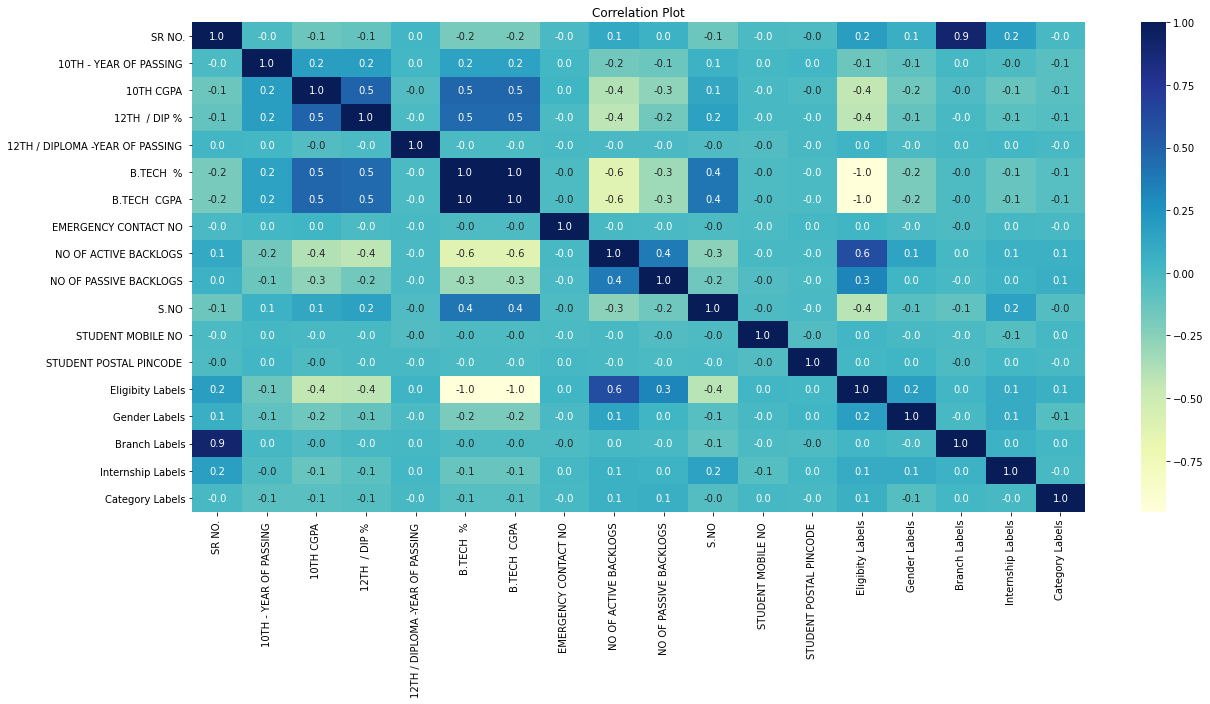

In [5]:
#plotting correlation matrix for checking correlation between variables and the eligibility labels

plt.figure(figsize = (20,9))
ax = plt.subplot()
sns.heatmap(student_clean_data.corr(),annot=True, fmt='.1f', ax=ax, cmap="YlGnBu")
ax.set_title('Correlation Plot')

In [6]:
#new dataframe for training model

new_student_clean_data = pd.DataFrame()

new_student_clean_data['10TH CGPA'] = student_clean_data['10TH CGPA ']
new_student_clean_data['12TH  / DIP %'] = student_clean_data['12TH  / DIP % ']
#new_student_clean_data['B.TECH  CGPA'] = student_clean_data['B.TECH  CGPA ']
new_student_clean_data['NO OF ACTIVE BACKLOGS'] = student_clean_data['NO OF ACTIVE BACKLOGS ']
new_student_clean_data['NO OF PASSIVE BACKLOGS'] = student_clean_data['NO OF PASSIVE BACKLOGS ']
new_student_clean_data['Gender Labels'] = student_clean_data['Gender Labels']
new_student_clean_data['Internship Labels'] = student_clean_data['Internship Labels']
new_student_clean_data['Branch Labels'] = student_clean_data['Branch Labels']
new_student_clean_data['Category Labels'] = student_clean_data['Category Labels']

In [7]:
#extracting features and labels from the dataset

X = new_student_clean_data
Y = student_clean_data['Eligibity Labels']

In [8]:
#splitting data into training and testing set

X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=42, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(909, 8)
(390, 8)


# Logistic Regression Model

In [9]:
#logistic regression model

logisticregression_model = LogisticRegression()
logisticregression_model.fit(X_train, y_train)

c:\Users\rramb\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
#prediction result of the model

predicted_LR = logisticregression_model.predict(X_test)
print("Predicted Labels:\n")
predicted_LR

Predicted Labels:



array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,

In [11]:
#accuracy of the logistic regression model for training and testing set

print('Accuracy of Logistic Regression on training set: {:.2f}'.format(logisticregression_model.score(X_train, y_train)))
print('Accuracy of Logistic Regression on test set:     {:.2f}'.format(logisticregression_model.score(X_test, y_test)))

testaccuracy_LR = logisticregression_model.score(X_test, y_test)
accuracy_result_LR = round(testaccuracy_LR,2)
accuracy_result_LR

Accuracy of Logistic Regression on training set: 0.93
Accuracy of Logistic Regression on test set:     0.95


0.95

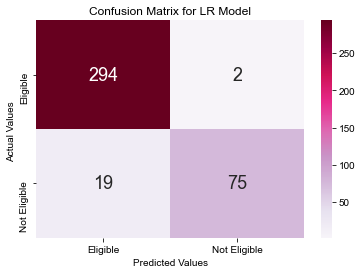

In [12]:
#confusion matrix for LR Model

confusion_matrix_LR = confusion_matrix(y_test, predicted_LR)


fig = sns.heatmap(confusion_matrix_LR, annot=True,  annot_kws={"size": 18}, cmap = 'PuRd',fmt='g')
fig.xaxis.set_ticklabels(['Eligible','Not Eligible'])
fig.yaxis.set_ticklabels(['Eligible','Not Eligible'])
fig.set_xlabel('Predicted Values')
fig.set_ylabel('Actual Values ');
fig.set_title('Confusion Matrix for LR Model')
sns.set(font_scale=1.4)

In [13]:
#classification report for LR Model

print("\n Classification report %s:\n%s\n" % (logisticregression_model, metrics.classification_report(y_test, predicted_LR)))


 Classification report LogisticRegression():
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       296
           1       0.97      0.80      0.88        94

    accuracy                           0.95       390
   macro avg       0.96      0.90      0.92       390
weighted avg       0.95      0.95      0.94       390




# Random Forest Classifier

In [12]:
#random forest classifier


randomforest_model = RandomForestClassifier()
randomforest_model.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
#prediction result of the model

predicted_RFC = randomforest_model.predict(X_test)
print("Predicted Labels:\n")
predicted_RFC

Predicted Labels:



array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,

In [30]:
#accuracy of the random forest classifier for training and testing set

print('Accuracy of Random Forest Classifier on training set: {:.2f}'.format(randomforest_model.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier on test set:     {:.2f}'.format(randomforest_model.score(X_test, y_test)))

accuracy_result_RFC = randomforest_model.score(X_test, y_test)
accuracy_result_RFC

Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set:     0.94


0.9358974358974359

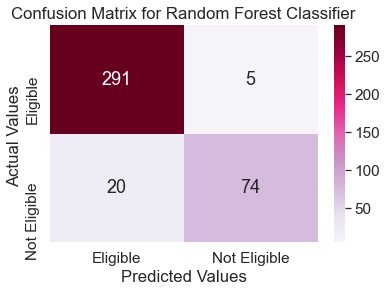

In [31]:
#confusion matrix

confusion_matrix_RFC = confusion_matrix(y_test, predicted_RFC)


fig = sns.heatmap(confusion_matrix_RFC, annot=True,  annot_kws={"size": 18}, cmap = 'PuRd',fmt='g')
fig.xaxis.set_ticklabels(['Eligible','Not Eligible'])
fig.yaxis.set_ticklabels(['Eligible','Not Eligible'])
fig.set_xlabel('Predicted Values')
fig.set_ylabel('Actual Values ');
fig.set_title('Confusion Matrix for Random Forest Classifier')
sns.set(font_scale=1.4)

In [32]:
#classification report for Random Forest Classifier Model

print("\n Classification report %s:\n%s\n" % (randomforest_model, metrics.classification_report(y_test, predicted_RFC)))


 Classification report RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       296
           1       0.94      0.79      0.86        94

    accuracy                           0.94       390
   macro avg       0.94      0.89      0.91       390
weighted avg       0.94      0.94      0.93       390




In [19]:
#feature importance

importance = randomforest_model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.12682
Feature: 1, Score: 0.25377
Feature: 2, Score: 0.38859
Feature: 3, Score: 0.08577
Feature: 4, Score: 0.02227
Feature: 5, Score: 0.00132
Feature: 6, Score: 0.06543
Feature: 7, Score: 0.05602


# Feature Importance Visual for Random Forest Classifier

<AxesSubplot:>

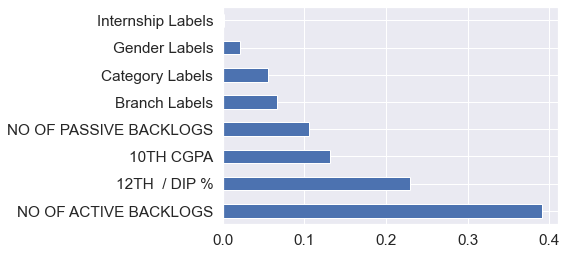

In [14]:
(pd.Series(randomforest_model.feature_importances_, index=X.columns)
   .nlargest(8)
   .plot(kind='barh'))

# SVM Linear Kernel

In [20]:
#svm classifier

svm_model = svm.SVC(kernel='linear') # Linear Kernel
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
#predict the response for test dataset

predicted_SVM = svm_model.predict(X_test)
print("Predicted Labels:\n")
predicted_SVM

Predicted Labels:



array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,

In [22]:
#accuracy of the SVM model for training and testing set

print('Accuracy of SVM on training set: {:.2f}'.format(svm_model.score(X_train, y_train)))
print('Accuracy of SVM on test set:     {:.2f}'.format(svm_model.score(X_test, y_test)))

accuracy_result_SVM = svm_model.score(X_test, y_test)
accuracy_result_SVM = round(accuracy_result_SVM,3)
accuracy_result_SVM

Accuracy of SVM on training set: 0.93
Accuracy of SVM on test set:     0.94


0.944

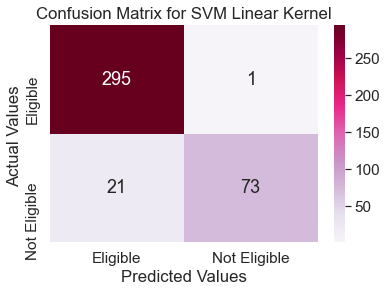

In [23]:
#confusion matrix

confusion_matrix_SVM = confusion_matrix(y_test, predicted_SVM)


fig = sns.heatmap(confusion_matrix_SVM, annot=True,  annot_kws={"size": 18}, cmap = 'PuRd',fmt='g')
fig.xaxis.set_ticklabels(['Eligible','Not Eligible'])
fig.yaxis.set_ticklabels(['Eligible','Not Eligible'])
fig.set_xlabel('Predicted Values')
fig.set_ylabel('Actual Values ');
fig.set_title('Confusion Matrix for SVM Linear Kernel')
sns.set(font_scale=1.4)

In [24]:
#classification report for SVM Model

print("\n Classification report %s:\n%s\n" % (svm_model, metrics.classification_report(y_test, predicted_SVM)))


 Classification report SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       296
           1       0.99      0.78      0.87        94

    accuracy                           0.94       390
   macro avg       0.96      0.89      0.92       390
weighted avg       0.95      0.94      0.94       390




# XGBoost Classifier

In [25]:
#xgboost classifier

model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [26]:
#predict the response for test dataset

predicted_XGB = model_XGB.predict(X_test)
print("Predicted Labels:\n")
predicted_XGB

Predicted Labels:



array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,

In [27]:
#accuracy of the XGB model for training and testing set

print('Accuracy of XGB on training set: {:.2f}'.format(model_XGB.score(X_train, y_train)))
print('Accuracy of XGB on test set:     {:.2f}'.format(model_XGB.score(X_test, y_test)))

accuracy_result_XGB = model_XGB.score(X_test, y_test)
accuracy_result_XGB = round(accuracy_result_XGB,3)
accuracy_result_XGB

Accuracy of XGB on training set: 1.00
Accuracy of XGB on test set:     0.93


0.926

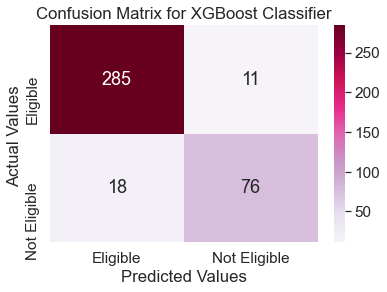

In [28]:
#confusion matrix

confusion_matrix_XGB = confusion_matrix(y_test, predicted_XGB)


fig = sns.heatmap(confusion_matrix_XGB, annot=True,  annot_kws={"size": 18}, cmap = 'PuRd',fmt='g')
fig.xaxis.set_ticklabels(['Eligible','Not Eligible'])
fig.yaxis.set_ticklabels(['Eligible','Not Eligible'])
fig.set_xlabel('Predicted Values')
fig.set_ylabel('Actual Values ');
fig.set_title('Confusion Matrix for XGBoost Classifier')
sns.set(font_scale=1.4)

In [29]:
#classification report for XGB Model

print("\n Classification report %s:\n%s\n" % (model_XGB, metrics.classification_report(y_test, predicted_XGB)))


 Classification report XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       296
           1       0.87      0.81      0.84        94

    accuracy                           0.93       390
   macro avg       0.91      0.89      0.90       390
weig

# Decision Tree Classifier

In [30]:
#decision tree classifier

model_decisiontree = DecisionTreeClassifier()
model_decisiontree.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
#predict the response for test dataset

predicted_decisiontree = model_decisiontree.predict(X_test)
print("Predicted Labels:\n")
predicted_decisiontree

Predicted Labels:



array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,

In [32]:
#accuracy of the Decision Tree model for training and testing set

print('Accuracy of Decision Tree Classifier on training set: {:.2f}'.format(model_decisiontree.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set:     {:.2f}'.format(model_decisiontree.score(X_test, y_test)))

accuracy_result_decisiontree = model_decisiontree.score(X_test, y_test)
accuracy_result_decisiontree = round(accuracy_result_decisiontree,3)
accuracy_result_decisiontree

Accuracy of Decision Tree Classifier on training set: 1.00
Accuracy of Decision Tree Classifier on test set:     0.87


0.869

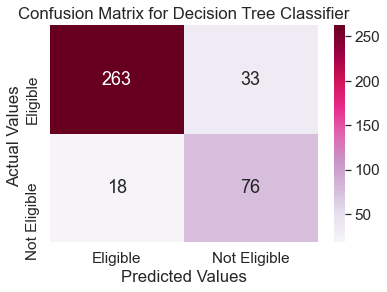

In [33]:
#confusion matrix

confusion_matrix_decisiontree = confusion_matrix(y_test, predicted_decisiontree)


fig = sns.heatmap(confusion_matrix_decisiontree, annot=True,  annot_kws={"size": 18}, cmap = 'PuRd',fmt='g')
fig.xaxis.set_ticklabels(['Eligible','Not Eligible'])
fig.yaxis.set_ticklabels(['Eligible','Not Eligible'])
fig.set_xlabel('Predicted Values')
fig.set_ylabel('Actual Values ');
fig.set_title('Confusion Matrix for Decision Tree Classifier')
sns.set(font_scale=1.4)

In [34]:
#classification report for Decision Tree Model

print("\n Classification report %s:\n%s\n" % (model_decisiontree, metrics.classification_report(y_test, predicted_decisiontree)))


 Classification report DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       296
           1       0.70      0.81      0.75        94

    accuracy                           0.87       390
   macro avg       0.82      0.85      0.83       390
weighted avg       0.88      0.87      0.87       390




# Comparing the accuracy of the models

In [35]:
#comparing accuracy of all models built

accuracy_data = [["Logistic Regression", accuracy_result_LR],["Random Forest Classifier", accuracy_result_RFC], ["SVM Linear Kernel", accuracy_result_SVM], ["XGBoost Classifier", accuracy_result_XGB], ['Decision Tree Classifier', accuracy_result_decisiontree]]


head = ["Machine Learning Model", "Accuracy of the model"]
print(tabulate(accuracy_data, headers=head))

Machine Learning Model      Accuracy of the model
------------------------  -----------------------
Logistic Regression                      0.95
Random Forest Classifier                 0.933333
SVM Linear Kernel                        0.944
XGBoost Classifier                       0.926
Decision Tree Classifier                 0.869


# Feature Importance - Logistic Regression Model

In [15]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': logisticregression_model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

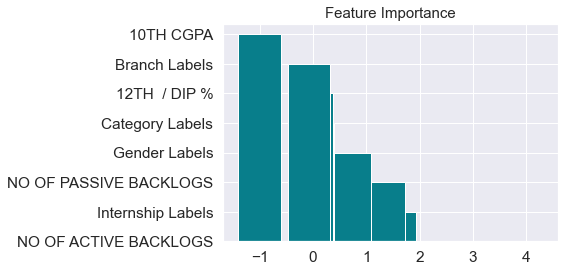

In [23]:
plt.bar(height=importances['Attribute'], x=importances['Importance'], color='#087E8B')
plt.title('Feature Importance', size=15)
plt.xticks(rotation='horizontal')
plt.show()

In [37]:
#pickling the model

import pickle
pickle_out = open("Student_Classifier.pkl", "wb")
pickle.dump(logisticregression_model, pickle_out)
pickle_out.close()